In [1]:
# import machine learning packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#import data
calendar=pd.read_csv('../data scientist/calendar.csv')
listings=pd.read_csv('../data scientist/listings.csv')
reviews=pd.read_csv('../data scientist/reviews.csv')

In [50]:
# Data understanding
#Calendar
#get to know columns of calendar
print(calendar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1048575 non-null  int64 
 1   date        1048575 non-null  object
 2   available   1048575 non-null  object
 3   price       699862 non-null   object
dtypes: int64(1), object(3)
memory usage: 32.0+ MB
None


In [51]:
#get to know the data period
print('min date:'+str(min(calendar['date']))+';max date'+str(max(calendar['date'])))

min date:2016/1/10;max date2017/1/2


In [9]:
#listing
#get to know columns type
print(listings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   float64
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [2]:
#get to know how many null values for each columns
listings_null_percentage=np.sum(listings.isnull())/listings.shape[0]
print(listings_null_percentage.sort_values(ascending=False))

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
last_review                         0.164222
first_review                        0.164222
reviews_per_month                   0.164222
space                               0.149031
host_respo

In [53]:
#review
#get to know columns information
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB
None


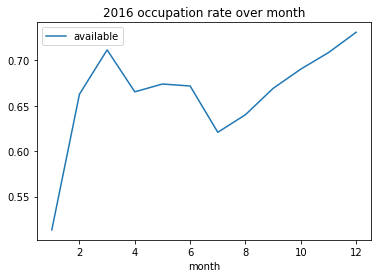

<ipython-input-56-f4428bb9c1e4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_2016['price']=calendar_2016['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')).astype(float)


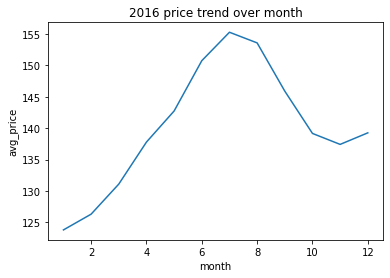

In [56]:
#question1:when is the best time to seattle
#Occupation rate over month in 2016
calendar['date']=pd.to_datetime(calendar['date'])
calendar['year']=calendar.date.dt.year
calendar['month']=calendar.date.dt.month
calendar_2016=calendar[calendar['year']==2016]
calendar_2016_occupation=calendar_2016[calendar_2016['available']=='t'].groupby(['month']).count()/calendar.groupby(['month']).count()
calendar_2016_occupation=calendar_2016_occupation.reset_index()
calendar_2016_occupation.plot(x='month',y='available',kind="line",title='2016 occupation rate over month')
plt.show()

#price over month
calendar_2016['price']=calendar_2016['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')).astype(float)
average_price_by_month = calendar_2016.groupby(['month'])['price'].mean()
average_price_by_month.plot(title='2016 price trend over month',xlabel="month",ylabel="avg_price")
plt.show()

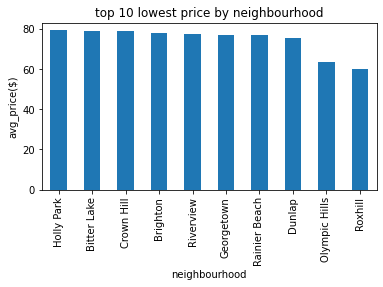

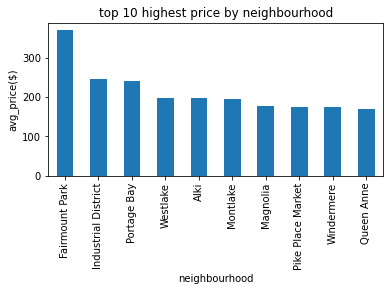

price                             1.000000
accommodates                      0.652218
bedrooms                          0.627720
beds                              0.589525
square_feet                       0.531752
bathrooms                         0.516424
guests_included                   0.392875
host_listings_count               0.093962
host_total_listings_count         0.093962
review_scores_location            0.075069
review_scores_rating              0.055551
review_scores_cleanliness         0.054357
review_scores_accuracy            0.019026
minimum_nights                    0.017297
review_scores_communication       0.012990
review_scores_checkin             0.007877
maximum_nights                   -0.003336
latitude                         -0.008904
availability_365                 -0.015550
availability_30                  -0.037653
review_scores_value              -0.041776
id                               -0.046289
availability_60                  -0.049336
host_id    

In [5]:
#question2:where is the best place to live in Seattle
listings['price'] = listings['price'].apply(lambda x:str(x).replace("$","").replace(",",""))
listings['price'] = listings['price'].astype(float)

listing_price_neighbourhood=listings['price'].groupby(listings['neighbourhood']).mean().sort_values(ascending=False)
listing_price_neighbourhood[-10:].plot(kind="bar",title="top 10 lowest price by neighbourhood",xlabel='neighbourhood',ylabel='avg_price($)')
plt.xticks(rotation =90)
plt.subplots_adjust(bottom=0.3)
plt.show()
listing_price_neighbourhood[:10].plot(kind="bar",title="top 10 highest price by neighbourhood",xlabel='neighbourhood',ylabel='avg_price($)')
plt.xticks(rotation =90)
plt.subplots_adjust(bottom=0.35)
plt.show()



#question3: what impact price
#cor analysis
cor=listings.corr()
print(cor['price'].sort_values(ascending=False))


#question4:data modeling for price
X=listings[["accommodates","bedrooms","beds","bathrooms","guests_included","reviews_per_month"]]
fill_mode=lambda col:col.fillna(col.mode()[0])
X=X.apply(fill_mode)
Y=listings['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True)
model=lm_model.fit(X_train,Y_train)
Y_predict_test=lm_model.predict(X_test)
Y_predict_train=lm_model.predict(X_train)
print('MeanSquared Error train:', mean_squared_error(Y_predict_train, Y_train))
print('MeanSquared Error test:', mean_squared_error(Y_predict_test, Y_test))
print('r2_score train:', r2_score(Y_predict_train, Y_train))
print('r2_score test:', r2_score(Y_predict_test, Y_test))
print('R2:',model.score(X_train,Y_train))
